In [1]:
import pandas as pd
import re
import numpy as np
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
fight_data = pd.read_csv('../feature_engineered_fight.csv')
fight_data.head()

,method,referee,weightclass,winner,date,f1,f2,f1_slmp,f2_slmp,f1_str_acc_%,f2_str_acc_%,f1_sapm,f2_sapm,f1_str_def_%,f2_str_def_%,f1_td_avg,f2_td_avg,f1_td_acc_%,f2_td_acc_%,f1_td_def_%,f2_td_def_%,f1_sub_avg,f2_sub_avg,f1_height,f2_height,f1_weight,f2_weight,f1_reach,f2_reach,f1_stance,f2_stance
0,Decision - Unanimous,Herb Dean,featherweight,f1,2024-05-18,Lerone Murphy,Edson Barboza,8.80,3.16,60.44,32.64,3.16,8.80,67.36,39.56,2.40,0.00,66,0,100,34,0.00,0.0,175.26,180.34,65.77,65.77,185.42,190.50,Orthodox,Orthodox
1,KO/TKO,Dan Miragliotta,welterweight,f1,2024-05-18,Khaos Williams,Carlston Harris,8.00,9.33,60.00,46.67,9.33,8.00,53.33,40.00,0.00,0.00,0,0,100,100,0.00,0.0,182.88,182.88,77.11,77.11,195.58,193.04,Orthodox,Orthodox
2,Decision - Unanimous,Mark Smith,welterweight,f1,2024-05-18,Themba Gorimbo,Ramiz Brahimaj,2.87,0.20,82.69,50.00,0.20,2.87,50.00,17.31,5.00,1.00,83,12,88,17,0.00,0.0,185.42,177.80,77.11,77.11,195.58,182.88,Orthodox,Orthodox
3,KO/TKO,Chris Tognoni,bantamweight,f1,2024-05-18,Adrian Yanez,Vinicius Salvador,12.93,6.11,64.29,50.00,6.11,12.93,50.00,35.71,0.00,0.00,0,0,100,100,0.00,0.0,170.18,170.18,61.23,61.23,177.80,177.80,Orthodox,Southpaw
4,Submission,Herb Dean,strawweight,f1,2024-05-18,Angela Hill,Luana Pinheiro,3.04,1.85,35.44,28.33,1.85,3.04,71.67,64.56,3.26,1.63,33,14,86,67,0.11,0.0,160.02,157.48,52.16,52.16,162.56,157.48,Orthodox,Orthodox


In [3]:
## only get last ten years 
fight_data = fight_data[:5126]

In [4]:
fight_data

,method,referee,weightclass,winner,date,f1,f2,f1_slmp,f2_slmp,f1_str_acc_%,f2_str_acc_%,f1_sapm,f2_sapm,f1_str_def_%,f2_str_def_%,f1_td_avg,f2_td_avg,f1_td_acc_%,f2_td_acc_%,f1_td_def_%,f2_td_def_%,f1_sub_avg,f2_sub_avg,f1_height,f2_height,f1_weight,f2_weight,f1_reach,f2_reach,f1_stance,f2_stance
0,Decision - Unanimous,Herb Dean,featherweight,f1,2024-05-18,Lerone Murphy,Edson Barboza,8.80,3.16,60.44,32.64,3.16,8.80,67.36,39.56,2.40,0.00,66,0,100,34,0.00,0.00,175.26,180.34,65.77,65.77,185.42,190.50,Orthodox,Orthodox
1,KO/TKO,Dan Miragliotta,welterweight,f1,2024-05-18,Khaos Williams,Carlston Harris,8.00,9.33,60.00,46.67,9.33,8.00,53.33,40.00,0.00,0.00,0,0,100,100,0.00,0.00,182.88,182.88,77.11,77.11,195.58,193.04,Orthodox,Orthodox
2,Decision - Unanimous,Mark Smith,welterweight,f1,2024-05-18,Themba Gorimbo,Ramiz Brahimaj,2.87,0.20,82.69,50.00,0.20,2.87,50.00,17.31,5.00,1.00,83,12,88,17,0.00,0.00,185.42,177.80,77.11,77.11,195.58,182.88,Orthodox,Orthodox
3,KO/TKO,Chris Tognoni,bantamweight,f1,2024-05-18,Adrian Yanez,Vinicius Salvador,12.93,6.11,64.29,50.00,6.11,12.93,50.00,35.71,0.00,0.00,0,0,100,100,0.00,0.00,170.18,170.18,61.23,61.23,177.80,177.80,Orthodox,Southpaw
4,Submission,Herb Dean,strawweight,f1,2024-05-18,Angela Hill,Luana Pinheiro,3.04,1.85,35.44,28.33,1.85,3.04,71.67,64.56,3.26,1.63,33,14,86,67,0.11,0.00,160.02,157.48,52.16,52.16,162.56,157.48,Orthodox,Orthodox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,Decision - Split,Steve Newport,lightweight,f1,2013-07-27,Daron Cruickshank,Yves Edwards,2.93,3.20,30.99,38.10,3.20,2.93,61.90,69.01,0.00,0.00,0,0,100,100,0.00,0.00,172.72,175.26,70.31,70.31,182.88,185.42,Switch,Southpaw
5122,Decision - Split,Herb Dean,middleweight,f1,2013-07-27,Ed Herman,Trevor Smith,4.87,5.80,56.59,80.56,5.80,4.87,19.44,43.41,2.00,1.00,40,20,80,60,0.07,0.07,185.42,190.50,92.99,83.91,195.58,190.50,Orthodox,Orthodox
5123,Decision - Split,Randy Corley,bantamweight,f1,2013-07-27,Germaine de Randamie,Julie Kedzie,3.33,1.87,60.98,36.84,1.87,3.33,63.16,39.02,0.00,2.00,0,22,78,100,0.00,0.00,175.26,165.10,61.23,61.23,180.34,168.86,Orthodox,Orthodox
5124,Decision - Split,Randy Corley,lightweight,f1,2013-07-27,Justin Salas,Aaron Riley,3.60,1.73,38.57,15.12,1.73,3.60,84.88,61.43,3.00,0.00,33,0,100,67,0.00,0.00,172.72,172.72,70.31,70.31,177.80,175.26,Southpaw,Southpaw


In [5]:
# Create two dataframes by splitting the fight_data into two parts for each fighter
fighter1 = fight_data[['f1', 'f1_height', 'f1_weight', 'f1_reach', 'f1_slmp', 'f1_str_acc_%', 'f1_sapm', 'f1_str_def_%', 'f1_td_avg', 'f1_td_acc_%', 'f1_td_def_%', 'f1_sub_avg', 'f1_stance']]
fighter2 = fight_data[['f1', 'f2_height', 'f2_weight', 'f2_reach', 'f2_slmp', 'f2_str_acc_%', 'f2_sapm', 'f2_str_def_%', 'f2_td_avg', 'f2_td_acc_%', 'f2_td_def_%', 'f2_sub_avg', 'f2_stance']]

# Rename columns to match the desired columns in fighters dataframe
fighter1.columns = ['name', 'height', 'weight', 'reach', 'slpm', 'str_acc_%', 'sapm', 'str_def_%', 'td_avg', 'td_acc_%', 'td_def_%', 'sub_avg', 'stance']
fighter2.columns = ['name', 'height', 'weight', 'reach', 'slpm', 'str_acc_%', 'sapm', 'str_def_%', 'td_avg', 'td_acc_%', 'td_def_%', 'sub_avg', 'stance']

# # Concatenate the two dataframes
fighters = pd.concat([fighter1, fighter2], ignore_index=True)

# Display fighters dataframe
display(fighters)

,name,height,weight,reach,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg,stance
0,Lerone Murphy,175.26,65.77,185.42,8.80,60.44,3.16,67.36,2.40,66,100,0.00,Orthodox
1,Khaos Williams,182.88,77.11,195.58,8.00,60.00,9.33,53.33,0.00,0,100,0.00,Orthodox
2,Themba Gorimbo,185.42,77.11,195.58,2.87,82.69,0.20,50.00,5.00,83,88,0.00,Orthodox
3,Adrian Yanez,170.18,61.23,177.80,12.93,64.29,6.11,50.00,0.00,0,100,0.00,Orthodox
4,Angela Hill,160.02,52.16,162.56,3.04,35.44,1.85,71.67,3.26,33,86,0.11,Orthodox
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10247,Daron Cruickshank,175.26,70.31,185.42,3.20,38.10,2.93,69.01,0.00,0,100,0.00,Southpaw
10248,Ed Herman,190.50,83.91,190.50,5.80,80.56,4.87,43.41,1.00,20,60,0.07,Orthodox
10249,Germaine de Randamie,165.10,61.23,168.86,1.87,36.84,3.33,39.02,2.00,22,100,0.00,Orthodox
10250,Justin Salas,172.72,70.31,175.26,1.73,15.12,3.60,61.43,0.00,0,67,0.00,Southpaw


In [6]:
fighters.columns

Index(['name', 'height', 'weight', 'reach', 'slpm', 'str_acc_%', 'sapm',
       'str_def_%', 'td_avg', 'td_acc_%', 'td_def_%', 'sub_avg', 'stance'],
      dtype='object')

In [7]:
name_counts = fighters.groupby('name').size().reset_index(name='count')
name_counts['count'].mean()

7.959627329192546

In [8]:
#get up to last three fights per fighter
first_three_occurrences = fighters.groupby('name').head(3).reset_index(drop=True)
name_counts = first_three_occurrences.groupby('name').size().reset_index(name='count')
name_counts['count'].mean()

2.724378881987578

In [9]:
fighters = first_three_occurrences

In [10]:
fighters['stance'] = fighters['stance'].replace(['Southpaw', 'Switch', 'Open Stance', 'Sideways'], 'Unorthodox')
fighters['stance'].value_counts()

stance
Orthodox      2611
Unorthodox     898
Name: count, dtype: int64

In [11]:
cluster_data = fighters[['reach', 'stance', 'slpm', 'str_acc_%', 'sapm', 'str_def_%', 'td_avg', 'td_acc_%', 'td_def_%', 'sub_avg']]

In [12]:
cluster_data

,reach,stance,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg
0,185.42,Orthodox,8.80,60.44,3.16,67.36,2.40,66,100,0.00
1,195.58,Orthodox,8.00,60.00,9.33,53.33,0.00,0,100,0.00
2,195.58,Orthodox,2.87,82.69,0.20,50.00,5.00,83,88,0.00
3,177.80,Orthodox,12.93,64.29,6.11,50.00,0.00,0,100,0.00
4,162.56,Orthodox,3.04,35.44,1.85,71.67,3.26,33,86,0.11
...,...,...,...,...,...,...,...,...,...,...
3504,185.42,Orthodox,0.47,28.00,1.93,54.69,0.00,0,0,0.00
3505,185.00,Unorthodox,1.65,47.50,1.73,55.56,3.90,60,60,0.26
3506,193.04,Orthodox,0.00,0.00,1.05,44.44,0.00,0,34,0.00
3507,177.80,Orthodox,3.60,100.00,7.20,62.50,0.00,0,100,0.00


In [13]:
# cluster data 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load your dataset
df = cluster_data

# Preprocessing
# Perform one-hot encoding for the categorical feature
df = pd.get_dummies(df, columns=['stance'], drop_first=True)

# Separate numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X_numerical = df[numerical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X_numerical)

# Combine scaled numerical features with encoded categorical features
preprocessed_data = pd.concat([pd.DataFrame(scaled_numerical, columns=numerical_features), df.drop(columns=numerical_features)], axis=1)

In [14]:
preprocessed_data

,reach,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg,stance_Unorthodox
0,0.342902,0.969720,0.718614,-0.092916,0.721686,0.177266,0.976807,0.652425,-0.310368,False
1,1.256283,0.774559,0.688736,2.291179,-0.183128,-0.595704,-0.846158,0.652425,-0.310368,False
2,1.256283,-0.476908,2.229513,-1.236663,-0.397884,1.014649,1.446359,0.275968,-0.310368,False
3,-0.342134,1.977236,0.980050,1.046967,-0.397884,-0.595704,-0.846158,0.652425,-0.310368,False
4,-1.712206,-0.435436,-0.979025,-0.599101,0.999644,0.454246,0.065325,0.213225,0.200785,False
...,...,...,...,...,...,...,...,...,...,...
3504,0.342902,-1.062390,-1.484243,-0.568189,-0.095419,-0.595704,-0.846158,-2.484716,-0.310368,False
3505,0.305144,-0.774528,-0.160084,-0.645469,-0.039312,0.660372,0.811083,-0.602431,0.897811,True
3506,1.027938,-1.177047,-3.385599,-0.908222,-0.756456,-0.595704,-0.846158,-1.418088,-0.310368,False
3507,-0.342134,-0.298824,3.404958,1.468144,0.408258,-0.595704,-0.846158,0.652425,-0.310368,False


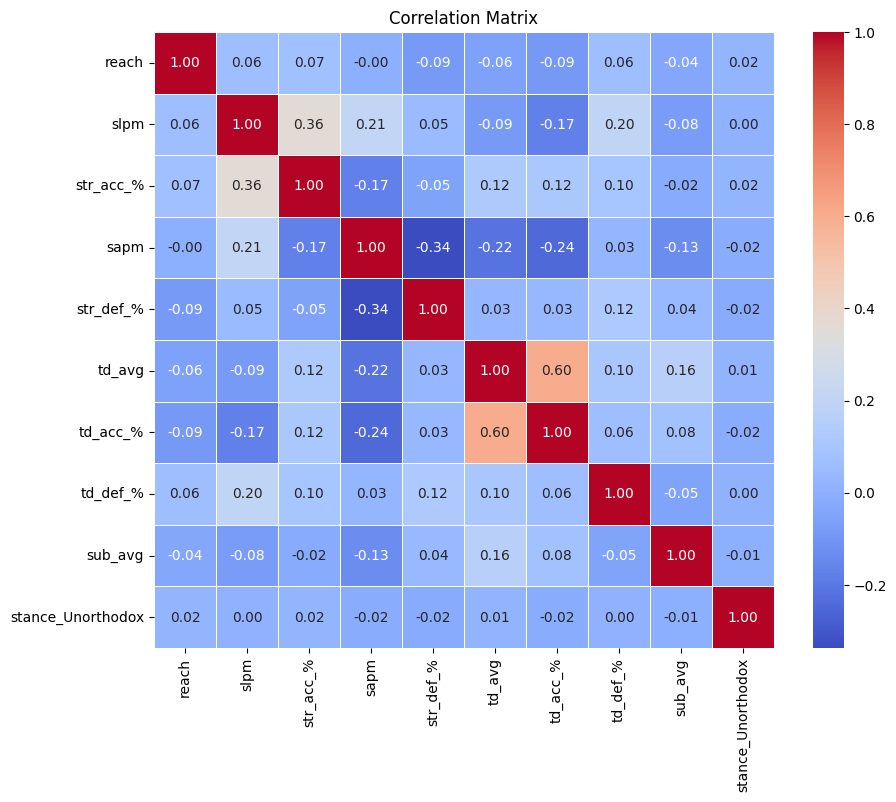

In [15]:
# Compute pairwise correlation
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

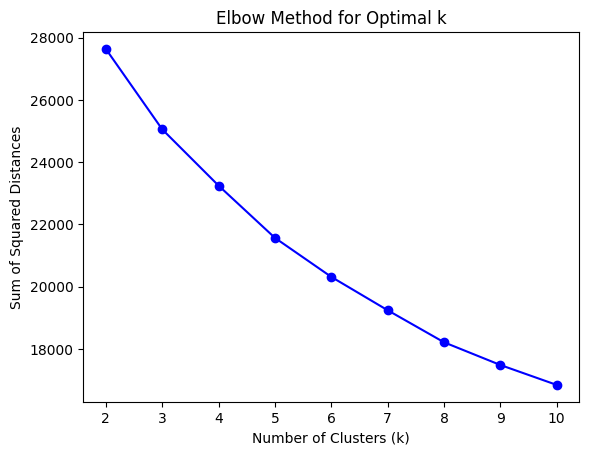

In [16]:
# Load dataset
df = cluster_data

# Preprocessing
# Perform one-hot encoding for the categorical feature
df = pd.get_dummies(df, columns=['stance'], drop_first=True)

# Separate numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X_numerical = df[numerical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X_numerical)

# Combine scaled numerical features with encoded categorical features
preprocessed_data = pd.concat([pd.DataFrame(scaled_numerical, columns=numerical_features), df.drop(columns=numerical_features)], axis=1)

# Define range of clusters to try
k_range = range(2, 11)  # Try k from 2 to 10

# Calculate sum of squared distances for each k
ssd = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_data)
    ssd.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

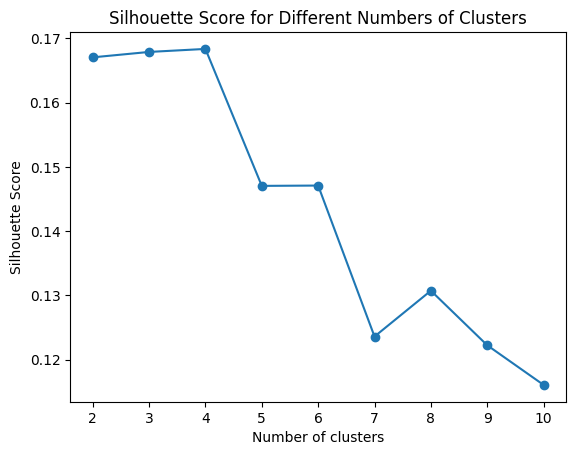

In [17]:
# Calculate silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(preprocessed_data)
    silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

> k = 4!!

In [18]:
# Load your dataset
df = cluster_data

# Preprocessing
# Perform one-hot encoding for the categorical feature
df = pd.get_dummies(df, columns=['stance'], drop_first=True)

# Separate numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X_numerical = df[numerical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X_numerical)

# Combine scaled numerical features with encoded categorical features
preprocessed_data = pd.concat([pd.DataFrame(scaled_numerical, columns=numerical_features), df.drop(columns=numerical_features)], axis=1)

# Choose the numbe8 of clusters
num_clusters = 4

# Build the clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(preprocessed_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
fighters['cluster'] = cluster_labels

In [19]:
fighters

,name,height,weight,reach,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg,stance,cluster
0,Lerone Murphy,175.26,65.77,185.42,8.80,60.44,3.16,67.36,2.40,66,100,0.00,Orthodox,2
1,Khaos Williams,182.88,77.11,195.58,8.00,60.00,9.33,53.33,0.00,0,100,0.00,Orthodox,3
2,Themba Gorimbo,185.42,77.11,195.58,2.87,82.69,0.20,50.00,5.00,83,88,0.00,Orthodox,2
3,Adrian Yanez,170.18,61.23,177.80,12.93,64.29,6.11,50.00,0.00,0,100,0.00,Orthodox,3
4,Angela Hill,160.02,52.16,162.56,3.04,35.44,1.85,71.67,3.26,33,86,0.11,Orthodox,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,Francis Carmont,180.34,83.91,185.42,0.47,28.00,1.93,54.69,0.00,0,0,0.00,Orthodox,0
3505,Dylan Andrews,180.34,83.91,185.00,1.65,47.50,1.73,55.56,3.90,60,60,0.26,Unorthodox,2
3506,Chael Sonnen,185.42,92.99,193.04,0.00,0.00,1.05,44.44,0.00,0,34,0.00,Orthodox,0
3507,Steven Siler,167.64,65.77,177.80,3.60,100.00,7.20,62.50,0.00,0,100,0.00,Orthodox,3


In [20]:
fighters['cluster'].value_counts()

cluster
3    1511
2    1180
0     751
1      67
Name: count, dtype: int64

In [21]:
import pandas as pd

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a DataFrame to store centroids with feature names as columns
centroids_df = pd.DataFrame(centroids, columns=fighters.columns[3:-1])  # Exclude the 'cluster' column

# Transpose the DataFrame to have features as rows and clusters as columns
centroids_df = centroids_df.transpose()

# Add cluster labels as columns
centroids_df.columns = [f'Cluster {i}' for i in range(num_clusters)]

# Display the centroids DataFrame
display(centroids_df)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
reach,-0.138317,-0.214624,-0.133079,0.182396
slpm,-0.368604,0.124594,-0.253858,0.376268
str_acc_%,-0.236475,-0.191716,0.219235,-0.045652
sapm,-0.041112,-0.628744,-0.386512,0.350872
str_def_%,-0.265507,0.582654,0.087069,0.037866
td_avg,-0.262477,1.828191,0.714538,-0.510076
td_acc_%,-0.298016,0.327103,1.089790,-0.719560
td_def_%,-1.597658,0.098509,0.389351,0.484391
sub_avg,-0.036390,5.302599,0.004454,-0.220693
stance,0.245333,0.268657,0.253807,0.262252


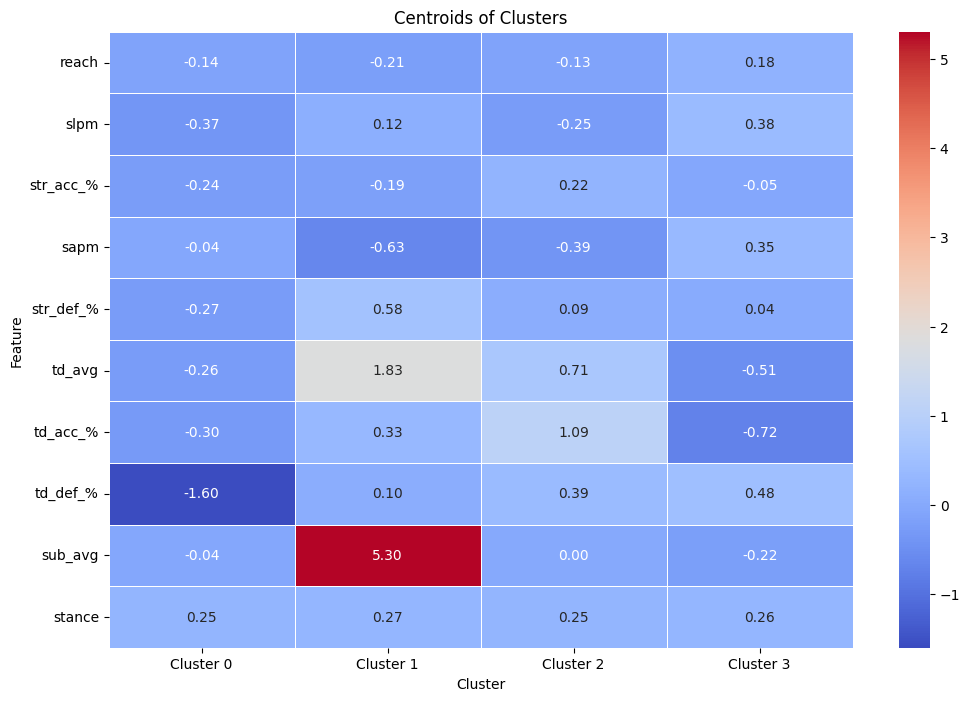

In [22]:
# Plot the centroids heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Centroids of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

### Fighter Styles by Cluster

| Metric       | Cluster 0                                | Cluster 1                                           | Cluster 2                                | Cluster 3                                |
|--------------|-------------------------------------------|-----------------------------------------------------|------------------------------------------|------------------------------------------|
| **Reach**    | Slightly below average                    | Below average                                       | Slightly below average                   | Above average                            |
| **SLpM**     | Below average                             | Slightly above average                              | Below average                            | Above average                            |
| **Str. Acc.**| Below average                             | Below average                                       | Above average                            | Slightly below average                   |
| **SApM**     | Average                                   | Significantly below average (strong defense)        | Below average                            | Above average (takes more hits)          |
| **Str. Def.**| Below average                             | Above average (good at avoiding strikes)            | Slightly above average                   | Average                                  |
| **TD Avg.**  | Below average                             | Significantly above average (effective grapplers)   | Above average                            | Below average                            |
| **TD Acc.**  | Below average                             | Above average                                       | Significantly above average              | Below average                            |
| **TD Def.**  | Significantly below average (vulnerable)  | Average                                             | Above average                            | Above average (hard to take down)        |
| **Sub. Avg.**| Average                                   | Extremely high (strong focus on submissions)        | Average                                  | Below average                            |
| **Stance**   | Slightly above average (mixed stances)    | Slightly above average (mixed stances)              | Slightly above average (mixed stances)   | Slightly above average (mixed stances)   |


### Suggested Names for Each Fighter Style

#### Cluster 0: "Unbalanced Striker"
- Fighters in this cluster are less effective in both striking and grappling, with significant weaknesses in takedown defense. They have balanced stances but struggle in overall combat efficiency.

#### Cluster 1: "Defensive Grappler"
- These fighters excel in grappling, particularly in takedowns and submissions, and have strong defensive capabilities. They are slightly above average in striking but primarily focus on grappling.

#### Cluster 2: "Precision All-Rounder"
- This group consists of well-rounded fighters who are precise strikers and effective in grappling. They have above-average takedown accuracy and defense, making them versatile in different combat situations.

#### Cluster 3: "Aggressive Striker"
- Fighters in this cluster are aggressive in striking with a significant number of strikes landed per minute. They have a good reach advantage but are more susceptible to taking hits. Their grappling skills are below average, focusing more on striking prowess.

In [23]:
## pickle all
import pickle

# Pickle the scaler
with open('../scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Pickle the dummy variables
with open('../dummy_variables.pkl', 'wb') as f:
    pickle.dump(df.drop(columns=numerical_features), f)

# Pickle the cluster labels
with open('../cluster_labels.pkl', 'wb') as f:
    pickle.dump(cluster_labels, f)

# Pickle the KMeans model
with open('../kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)